# Continuous Control with PPO

---

This notebook will present a flexible and simple implementation of the PPO reinforcement learning algorithm to solve the Reacher environment provided by [Unity Technologies ML Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher).

Part of the code has been inspired and tested against the PPO implementation from [Ilya Kostrikov](https://github.com/ikostrikov/pytorch-a2c-ppo-acktr-gail/tree/master/a2c_ppo_acktr).

### 1. Required Libraries

The following libraries and dependencies are used:

1. [Python 3.6](https://www.python.org/downloads/)
2. [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md)
3. [NumPy](http://www.numpy.org/)
4. [Pytorch 1.3](https://pytorch.org/)

And the following files has been defined:

1. agent.py : Contains the implementation of Random and PPO agents.
2. coach.py : Contains a function to run the environment with a specified agent and define the structure to learn from the environment.

In [1]:
from unityagents import UnityEnvironment

import numpy as np
import matplotlib.pyplot as plt

from agent import RandomAgent, PPOAgent
from coach import Coach

### 2. The environment

Double-jointed arms move in the environment towards targets represented by spheres. The goal is to maximize the time the agent "hand" is in the sphere. A rewards of +0.1 is then gained for each of those steps.

The environment is considered solved when the average score of all agents reaches an average of 30.0 over the last 100 episodes.

The Reacher environment can be downloaded here:

- [Linux](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux.zip)
- [Mac OSX](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher.app.zip)
- [Windows (32-bit)](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86.zip)
- [Windows (64-bit)](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Windows_x86_64.zip)

Before running the notebook ensure you have updated the path to the <i>Reacher.app</i> file below.

In [2]:
environment_directory='./Multiple_Reacher_Windows_x86_64/Reacher.app'

In [3]:
env = UnityEnvironment(file_name=environment_directory)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environment settings

In [4]:
env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)
action_space = brain.vector_action_space_size
observation_space = env_info.vector_observations.shape

print('Number of agents:', num_agents)
print('Action space:', action_space)
print('State space: {}'.format(observation_space))

Number of agents: 20
Action space: 4
State space: (20, 33)


### 3. Settings and Parameters

The following settings and parameters have been used to train the PPO agent.

In [5]:
num_episodes = 1000

learn_epoch = 4
batch_size = 512

gamma = 0.99
value_coef = 0.5
entropy_coef = 0.01

learning_rate = 3e-4
eps = 1e-5

clip = 0.2
max_grad = 0.2

save_interval = 100
log_interval = 100

save_directory = 'Checkpoint/'

### 4. Defining the Coach

The Coach will be responsible of running the agent and supervising its training.

In [6]:
coach = Coach(env=env,
              brain_name=brain_name,
              save_directory=save_directory
             )

We will run a random agent in the environment in order to better understand the environment and set the maximum steps limit.

In [7]:
random_agent = RandomAgent(observation_space=observation_space[1], 
                           action_space=action_space,
                           n_actors=num_agents)

In [8]:
total_steps, score = coach.watch(random_agent)

print('Total score (averaged over agents) for this episode: {:.3f}'.format(score))
print('Total steps of an episode : {}'.format(total_steps))     

Total score (averaged over agents) for this episode: 0.086
Total steps of an episode : 1001


### 5. Create and train PPO Actor-Critic Agent

We then created the PPO Agent and passed it to the Coach for training.

The model of the agent will consist of a double-headed Actor-Critic trained by the [Proximal Policy Optimization](https://arxiv.org/abs/1707.06347) algorithm:

---

<div style="text-align:center"><img src="img/actor_critic_model.png" width="500"/></div>

---

In [9]:
agent = PPOAgent(observation_space=observation_space[1], 
                 action_space=action_space,
                 n_actors=num_agents,
                 memory_size=total_steps,
                 lr=learning_rate,
                 eps=eps,
                 batch_size=batch_size,
                 epoch=learn_epoch,
                 gamma=gamma,
                 clip=clip,
                 max_grad=max_grad,
                 value_coef=value_coef,
                 entropy_coef=entropy_coef,
                 seed=0)

In [10]:
rewards, cum_rewards = coach.train(agent=agent, 
                                   num_episodes=num_episodes, 
                                   max_steps=total_steps,
                                   log_interval=log_interval,
                                   save_interval=save_interval)

Steps: 100100 | Episode:  100/1000 | Cum.Avg.Reward: 1.486 | Epis.Avg.Reward: 3.085 | Elaps.Time: 0h 21m 36s
Steps: 200200 | Episode:  200/1000 | Cum.Avg.Reward: 4.567 | Epis.Avg.Reward: 6.478 | Elaps.Time: 0h 43m 11s
Steps: 300300 | Episode:  300/1000 | Cum.Avg.Reward: 11.232 | Epis.Avg.Reward: 14.243 | Elaps.Time: 1h 04m 48s
Steps: 400400 | Episode:  400/1000 | Cum.Avg.Reward: 18.947 | Epis.Avg.Reward: 22.665 | Elaps.Time: 1h 26m 28s
Steps: 500500 | Episode:  500/1000 | Cum.Avg.Reward: 25.290 | Epis.Avg.Reward: 28.296 | Elaps.Time: 1h 48m 08s
Steps: 600600 | Episode:  600/1000 | Cum.Avg.Reward: 30.859 | Epis.Avg.Reward: 34.040 | Elaps.Time: 2h 09m 50s
Steps: 700700 | Episode:  700/1000 | Cum.Avg.Reward: 35.928 | Epis.Avg.Reward: 37.308 | Elaps.Time: 2h 31m 34s
Steps: 800800 | Episode:  800/1000 | Cum.Avg.Reward: 37.384 | Epis.Avg.Reward: 37.806 | Elaps.Time: 2h 53m 17s
Steps: 900900 | Episode:  900/1000 | Cum.Avg.Reward: 37.495 | Epis.Avg.Reward: 37.552 | Elaps.Time: 3h 14m 60s
Steps

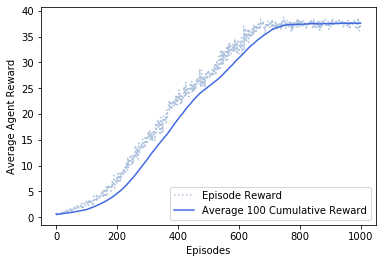

In [11]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(rewards)), np.asarray(rewards), c='lightsteelblue', linestyle=':', label='Episode Reward')
ax.plot(np.arange(len(rewards)), np.asarray(cum_rewards), c='royalblue', label='Average 100 Cumulative Reward')
ax.set(xlabel='Episodes', ylabel='Average Agent Reward')
ax.legend()
plt.show()

### 6. Watch the trained PPO-A2C Agent

In [12]:
agent.load(save_directory, 'PPO_Episode_1000.pth')

In [13]:
steps, score = coach.watch(agent)

print('Total score (averaged over agents) for this episode: {:.3f}'.format(score))

Total score (averaged over agents) for this episode: 37.724


### 7. Ideas for future work

1. While the environment is able to be solved within less than 1000 episodes, the hyper-parameters haven't been tuned. Some adjustments can be done in the Settings and Parameters section.
<br><br>
2. Some observations could be joined together as the input of the policy. This could help the neural network learn about speed and acceleration and could help with the precision of the hand position.
<br><br>
3. Implementing an RNN model instead of the actual MLP as the agent's model could maybe provide faster converging results.
<br><br>
4. Once the policy has been trained on the multiple agents environment it would be interesting to test the agent on the single agent environment. In a real-life scenario, training a policy over multiple agents can facilitate and accelerate training, but most of the time, the deployed policy will act on a single machine.
<br><br>
5. The actual PPO agent doesn't really <i>understand</i> what it is doing. It only tries to maximize rewards by adjusting actions without understanding the impact of those. It would be interesting to add a loss for the next state(s?) prediction in order for the agent to understand action-reaction.